In [12]:
import requests
import itertools
from arcgis.geometry import Geometry

import pandas as pd
from arcgis.features import SpatialDataFrame as SDF

from arcgis.gis import GIS, Item

import sys
sys.path.append('..')

import geometry_monkeypatch
import reach_tools

In [13]:
putin_geom = Geometry(y=45.794848, x=-121.634402, spatialReference={'wkid': 4326})
takeout_geom = Geometry(y=45.718817, x=-121.645582, spatialReference={'wkid': 4326})

In [71]:
import importlib
importlib.reload(reach_tools)
importlib.reload(geometry_monkeypatch)

<module 'geometry_monkeypatch' from '../geometry_monkeypatch.py'>

In [72]:
waters = reach_tools.WATERS()
gis = GIS()

In [73]:
ldub = reach_tools.Reach.get_from_aw(2156)
ldub

reach_id                                                             2156
name                                                                     
river_name                                            Little White Salmon
river_alternate_name                                                 None
error                                                                None
notes                                                                    
difficulty                                                              V
difficulty_minimum                                                   None
difficulty_maximum                                                      V
difficulty_outlier                                                   None
name_alternate                                                           
abstract                Washington's best known class V run flowing ye...
description             The Little White Salmon is a highlight of Paci...
update_aw                             

In [74]:
putin_geom = ldub.putin.geometry
putin_geom

{'x': -121.634402, 'y': 45.794848, 'spatialReference': {'wkid': 4326}}

In [75]:
ldub.putin.snap_to_nhdplus()
ldub.putin.nhdplus_measure

24505854

In [76]:
takeout_geom = ldub.takeout.geometry
takeout_geom

{'x': -121.645582, 'y': 45.718817, 'spatialReference': {'wkid': 4326}}

In [78]:
# get the snapped and corrected reach locations for the put-in
ldub.putin.snap_to_nhdplus()

print('putin geometry - {}'.format(ldub.putin.geometry))

# use the EPA navigate service to trace downstream
trace_polyline = waters.get_downstream_trace_polyline(ldub.putin.nhdplus_reach_id, ldub.putin.nhdplus_measure)

# project the takeout geometry to the same spatial reference as the trace polyline
takeout_geom = takeout_geom.match_spatial_reference(trace_polyline)

# snap the takeout geometry to the hydroline
takeout_geom = takeout_geom.snap_to_line(trace_polyline)

print('takeout geometry - {}'.format(takeout_geom))

# trim off the tail below the takeout
trace_polyline = trace_polyline.split_at_point(takeout_geom)[0]

trace_polyline

putin geometry - {'x': -121.633094507918, 'y': 45.7953236761081, 'spatialReference': {'wkid': 4326}}
takeout geometry - {'x': -121.645411521824, 'y': 45.7183001959982, 'spatialReference': {'wkid': 4326}}


{'paths': [[(-121.633094507621, 45.7953236766543),
   (-121.632808521595, 45.7949415287295),
   (-121.632717521896, 45.7943735286163),
   (-121.6334955218, 45.7932515290357),
   (-121.633564521385, 45.7930455285292),
   (-121.633434521685, 45.7927295292453),
   (-121.632061521322, 45.7921535287633),
   (-121.631961388107, 45.7919015288334),
   (-121.632457388497, 45.7912375287898),
   (-121.63229038799, 45.7909205285604),
   (-121.631244388317, 45.7902535292779),
   (-121.631282388271, 45.7898645293255),
   (-121.632885388449, 45.7883655285472),
   (-121.633014321553, 45.7874455292887),
   (-121.632686321716, 45.7869235285989),
   (-121.631969321926, 45.7865345286465),
   (-121.629261188053, 45.7854585959384),
   (-121.628185187896, 45.7846535956878),
   (-121.627140188269, 45.7835315952079),
   (-121.626941121535, 45.7830555957401),
   (-121.627071121235, 45.7822085953513),
   (-121.628055121646, 45.7815485954922),
   (-121.628444121598, 45.7814335955849),
   (-121.628711121321, 45.78

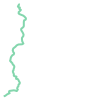

In [46]:
trace_polyline.as_shapely